# InfoPillar Solution - Machine Learning Virtual Internship Program


# Task 2: Fake News Detection Project

Done by : Padma Priya T R


Dataset : https://bit.ly/3FxCSC4

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
dataframe=pd.read_csv("news.csv")

In [3]:
dataframe.shape

(6335, 4)

In [4]:
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
labels=dataframe.label

In [6]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


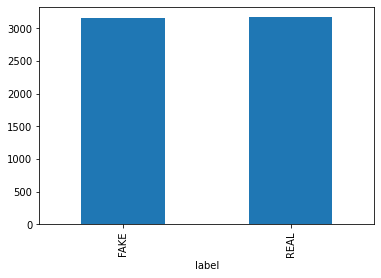

In [7]:
print(dataframe.groupby(['label'])['text'].count())
dataframe.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(dataframe["text"], labels, test_size=0.2, random_state=7)

In [9]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [10]:
from sklearn import metrics
lr=LogisticRegression()
lr.fit(tfidf_train,y_train)
y_prte=lr.predict(tfidf_train)
y_pred=lr.predict(tfidf_test)
lr_train = metrics.accuracy_score(y_train,y_prte)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy Training: {round(lr_train*100,2)}%')
print(f'Accuracy Testing: {round(score*100,2)}%')

Accuracy Training: 95.78%
Accuracy Testing: 91.71%


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


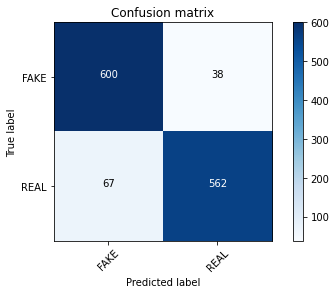

In [13]:
cm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [14]:
dt=DecisionTreeClassifier()
dt.fit(tfidf_train,y_train)
y_prte=dt.predict(tfidf_train)
y_pred=dt.predict(tfidf_test)
dt_train = metrics.accuracy_score(y_train,y_prte)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy Training: {round(dt_train*100,2)}%')
print(f'Accuracy Testing: {round(score*100,2)}%')

Accuracy Training: 100.0%
Accuracy Testing: 79.56%


Confusion matrix, without normalization


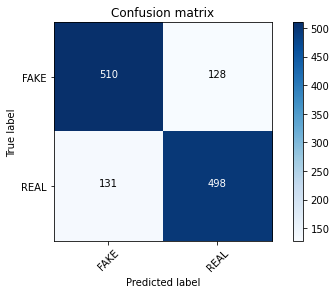

In [15]:
cm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [16]:
rf = RandomForestClassifier()
rf = rf.fit(tfidf_train,y_train)
rfy_pred=rf.predict(tfidf_train)
rfy_test=rf.predict(tfidf_test)
rfac_train = metrics.accuracy_score(y_train,rfy_pred)
print('Training Accuracy is: ',rfac_train*100)
rfac_test= metrics.accuracy_score(y_test,rfy_test)
print('Test Accuracy is: ',rfac_test*100)

Training Accuracy is:  100.0
Test Accuracy is:  89.8973954222573


Confusion matrix, without normalization


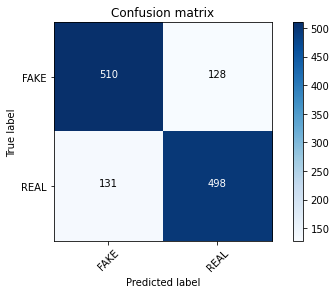

In [17]:
cm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [19]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(tfidf_train, y_train)
svmy_pred = svm.predict(tfidf_train)
svmy_tst=svm.predict(tfidf_test)
svmac_train= metrics.accuracy_score(y_train,svmy_pred )
print('Training Accuracy is: ',svmac_train*100)
svmac_test = metrics.accuracy_score(y_test,svmy_tst)
print('Test Accuracy is: ',svmac_test*100)

Training Accuracy is:  99.78295185477506
Test Accuracy is:  92.89660615627466


Confusion matrix, without normalization


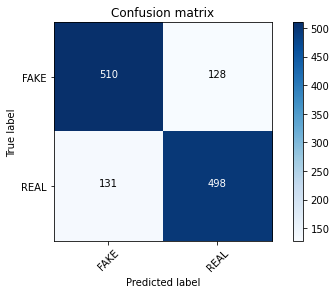

In [20]:
cm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])